In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set_style('whitegrid')
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.colors as mcolors
from collections import Counter

In [4]:
blm_df = pd.read_csv('blm_tweets_for_models.csv', index_col=0)
blm_df.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,6,popular,0.7845,0.000000,0.392250
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,6,popular,0.9081,0.366667,0.637383
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,6,popular,0.7783,-0.166667,0.305817
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,6,popular,0.0000,0.100000,0.050000
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,6,popular,0.0000,0.000000,0.000000


In [5]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse = True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

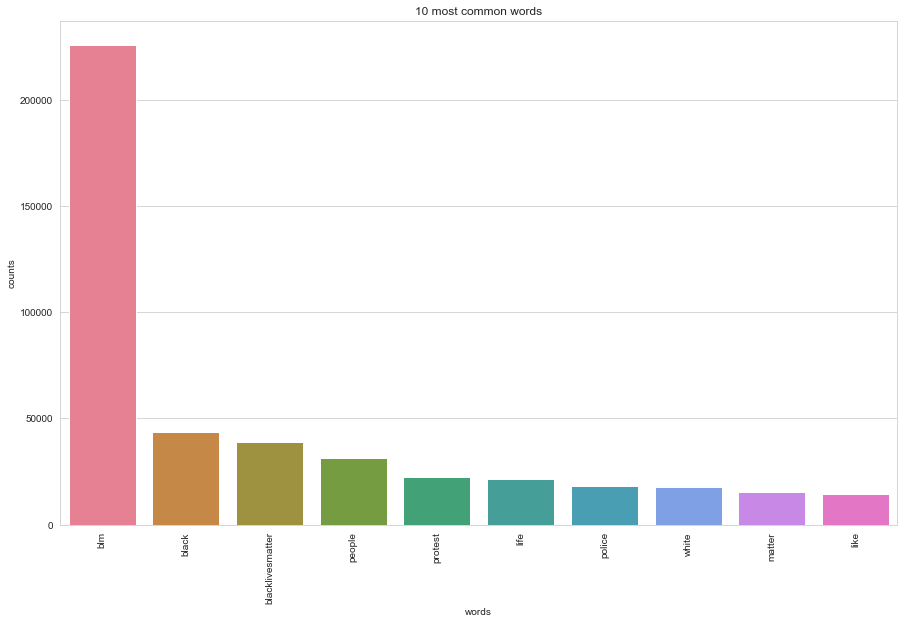

In [6]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(blm_df['tweet_lemmatized'])

#Visualize the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [7]:
def remove_blm(text):
    '''The input is any text and the output the word blm since it was the search word.'''
    text = re.sub(r"blm\S+","", text)
    return text

In [10]:
blm_df['tweet_lemmatized_no_blm'] = blm_df['tweet_lemmatized'].apply(lambda x: remove_blm(x))
blm_df.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent,tweet_lemmatized_no_blm
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,6,popular,0.7845,0.000000,0.392250,"['justice', 'peace', ' '']"
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,6,popular,0.9081,0.366667,0.637383,"['funny', 'thing', 'life', 'always', 'one', 'e..."
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,6,popular,0.7783,-0.166667,0.305817,"['protect', 'black', 'woman', 'protect', 'blac..."
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,6,popular,0.0000,0.100000,0.050000,"['kid', 'wrote', ' 'chalk', 'driveway', 'asked..."
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,6,popular,0.0000,0.000000,0.000000,"['genuflect', 'prostrate', 'repent', 'repeat',..."


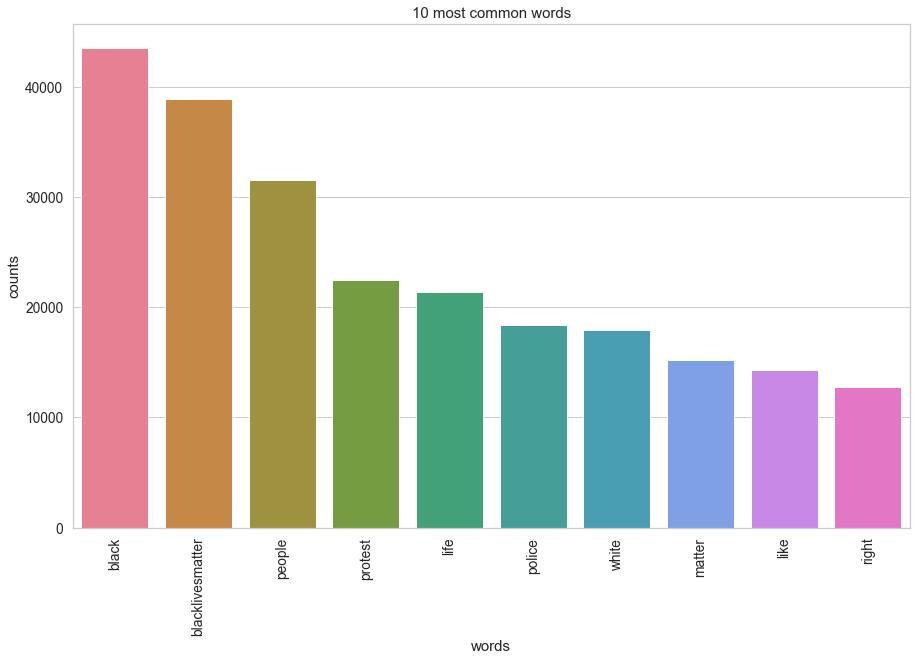

In [11]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(blm_df['tweet_lemmatized_no_blm'])

#Visualize the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [26]:
# Load the LDA mode from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Creating an instance for LDA
lda = LDA(n_components = 4, random_state = 1)

In [27]:
print('Fitting the vectorizer with the LDA')
lda.fit(count_data)

Fitting the vectorizer with the LDA


LatentDirichletAllocation(n_components=4, random_state=1)

In [28]:
print('Number of topics: ', len(lda.components_))
print('Number of columns of the lda fit: ', len(lda.components_[0]))

Number of topics:  4
Number of columns of the lda fit:  154131


In [29]:
feature = count_vectorizer.get_feature_names()
print('Length of feature names: ', len(feature))

Length of feature names:  154131


In [30]:
for ind, topic in enumerate(lda.components_):
    print('Top 50 words in topic {}'.format(ind))
    print('-'*25)
    top_50 = topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

Top 50 words in topic 0
-------------------------
['friend', 'got', 'community', 'killed', 'year', 'world', 'fight', 'officer', 'justice', 'use', 'fuck', 'feel', 'help', 'life', 'racism', 'love', 'shit', 'good', 'really', 'acab', 'day', 'way', 'think', 'stand', 'let', 'stop', 'racist', 'movement', 'dont', 'thing', 'going', 'want', 'im', 'change', 'man', 'support', 'say', 'make', 'know', 'need', 'right', 'cop', 'time', 'protest', 'like', 'police', 'white', 'blacklivesmatter', 'black', 'people'] 


Top 50 words in topic 1
-------------------------
['sign', 'official', 'minneapolisriots', 'hear', 'mural', 'employee', 'riot', 'dont', 'people', 'thank', 'america', 'justiceforgeorgeflyod', 'love', 'ahmaudarbery', 'georgefloydmurder', 'georgefloydprotest', 'king', 'history', 'vote', 'street', 'trump', 'wear', 'movement', 'breonnataylor', 'blacklivesmatters', 'youtube', 'today', 'seattle', 'starbucks', 'georgefloydwasmurdered', 'icantbreathe', 'minneapolis', 'like', 'need', 'watch', 'newpost',

In [31]:
# Transform
blm_df_final = lda.transform(count_data)
print('Shape of the final dataframe: ', blm_df_final.shape)

Shape of the final dataframe:  (220504, 4)


In [32]:
print('\nChecking the probability distribution of one tweet belonging to the topic.\n')
print('Few words from 1st tweet: ', blm_df.tweet[0][:88], '\n')
print('Probability distribution: ', blm_df_final[0])


Checking the probability distribution of one tweet belonging to the topic.

Few words from 1st tweet:  NO JUSTICE, NO PEACE #BLM   

Probability distribution:  [0.08807727 0.73704037 0.09120539 0.08367698]


In [33]:
prob = blm_df_final[0][blm_df_final[0].argmax()].round(2)
print('Tweet belong to the topic ', blm_df_final[0].argmax(), 'with the probability of ', prob)

Tweet belong to the topic  1 with the probability of  0.74


In [78]:
print('\nChecking the probability distribution of one tweet belonging to the topic.\n')
print('Few words from 1st tweet: ', blm_df.tweet[200][:150], '\n')
print('Probability distribution: ', blm_df_final[200])


Checking the probability distribution of one tweet belonging to the topic.

Few words from 1st tweet:  Our street #TakesTheKnee #BLM @AntiRacismDay  

Probability distribution:  [0.06358715 0.5331037  0.34008233 0.06322681]


In [34]:
# Assigning the topcis to the dataframe
blm_df['topic'] = blm_df_final.argmax(axis=1)
blm_df.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent,tweet_lemmatized_no_blm,topic
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,6,popular,0.7845,0.000000,0.392250,"['justice', 'peace', ' '']",1
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,6,popular,0.9081,0.366667,0.637383,"['funny', 'thing', 'life', 'always', 'one', 'e...",0
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,6,popular,0.7783,-0.166667,0.305817,"['protect', 'black', 'woman', 'protect', 'blac...",0
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,6,popular,0.0000,0.100000,0.050000,"['kid', 'wrote', ' 'chalk', 'driveway', 'asked...",0
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,6,popular,0.0000,0.000000,0.000000,"['genuflect', 'prostrate', 'repent', 'repeat',...",1


In [73]:
# Mapping topics with label
# Looking at the words used in each topic, I gave a label based on the commonality between the words used
topic_label = {0: 'Pro-BLM', 1: 'Names of People and Places', 2: 'Politics', 3: 'Anti-BLM'}

# Mapping the dictionary with the dataframe to get the labels
blm_df['topic_name'] = blm_df['topic'].map(topic_label)

blm_df.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent,tweet_lemmatized_no_blm,topic,topic_name
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,6,popular,0.7845,0.000000,0.392250,"['justice', 'peace', ' '']",1,Names of People and Places
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,6,popular,0.9081,0.366667,0.637383,"['funny', 'thing', 'life', 'always', 'one', 'e...",0,Pro-BLM
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,6,popular,0.7783,-0.166667,0.305817,"['protect', 'black', 'woman', 'protect', 'blac...",0,Pro-BLM
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,6,popular,0.0000,0.100000,0.050000,"['kid', 'wrote', ' 'chalk', 'driveway', 'asked...",0,Pro-BLM
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,6,popular,0.0000,0.000000,0.000000,"['genuflect', 'prostrate', 'repent', 'repeat',...",1,Names of People and Places


In [43]:
# Visualization of the topics
def word_cloud(topic):
    topic_words = [feature[i] for i in lda.components_[topic].argsort()[-50:]]
    cloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2500, height=1800).generate(" ".join(topic_words))
    print('\nWordcloud for topic: ', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Wordcloud for topic:  0 



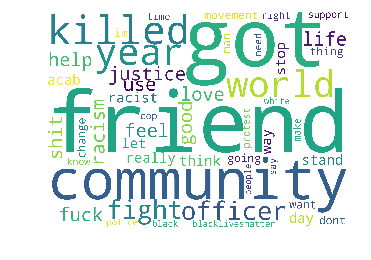

In [44]:
# Creating a wordcloud for topic 0
word_cloud(0)


Wordcloud for topic:  1 



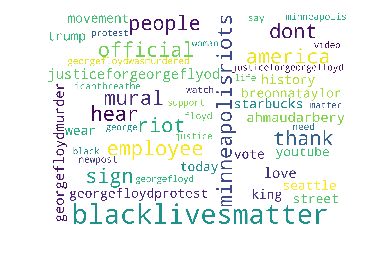

In [45]:
# Creating a wordcloud for topic 1
word_cloud(1)


Wordcloud for topic:  2 



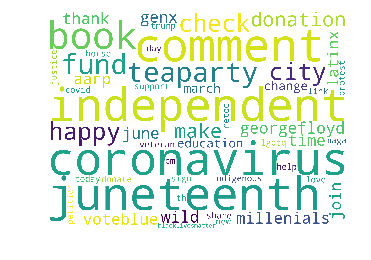

In [46]:
# Creating a wordcloud for topic 2
word_cloud(2)


Wordcloud for topic:  3 



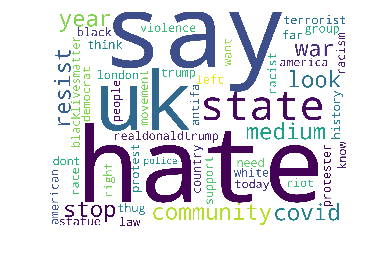

In [47]:
# Creating a wordcloud for topic 3
word_cloud(3)

In [52]:
# Looking at the spread of the different topics
blm_df['topic'].value_counts()

0    94044
3    59228
2    38035
1    29197
Name: topic, dtype: int64

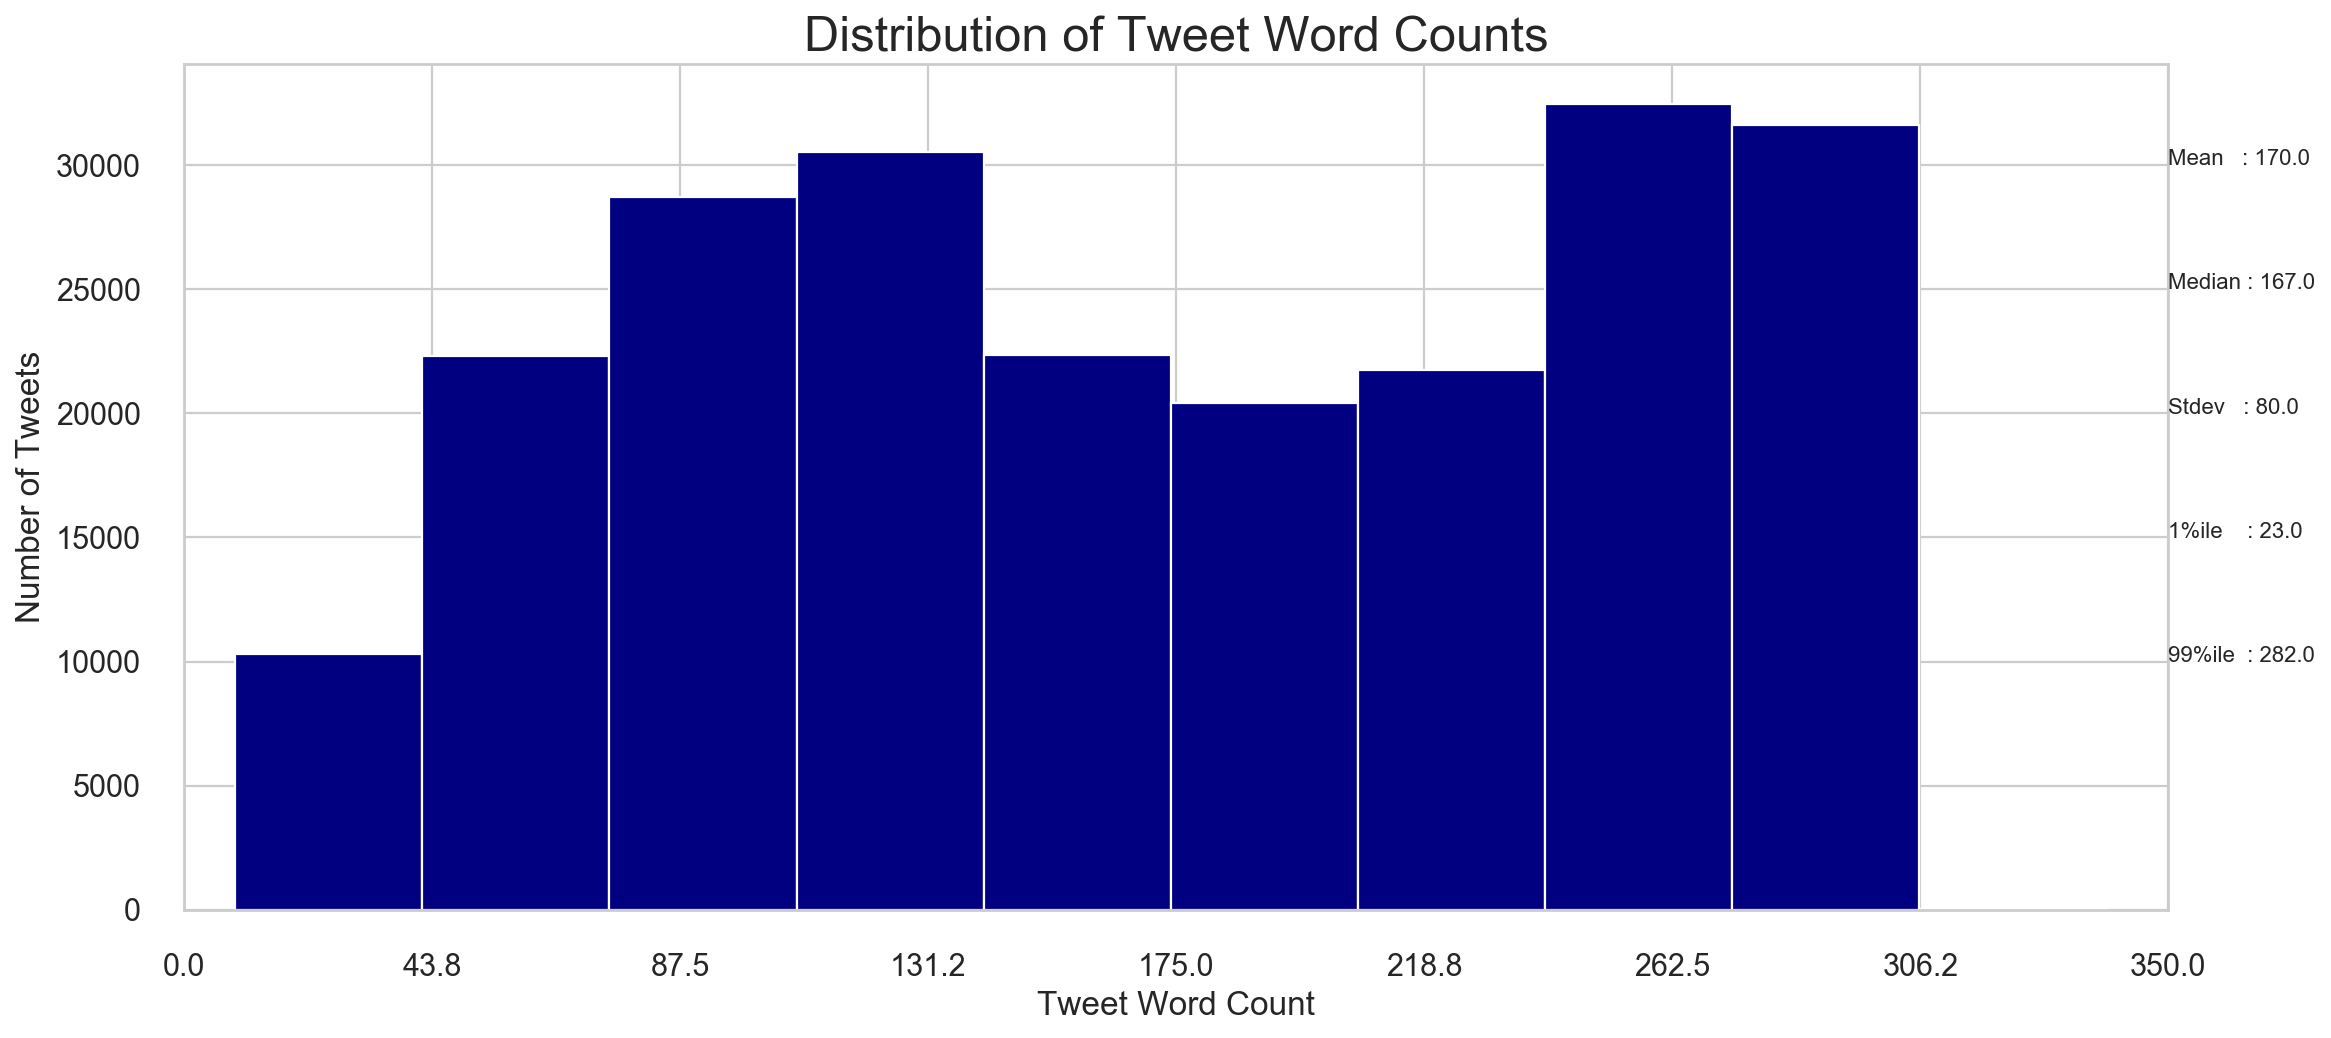

In [59]:
# Plotting tweet length distribution
plt.figure(figsize=(16,7), dpi=160)
plt.hist(blm_df['len'], color='navy')
plt.text(350, 30000, "Mean   : " + str(round(np.mean(blm_df['len']))))
plt.text(350,  25000, "Median : " + str(round(np.median(blm_df['len']))))
plt.text(350,  20000, "Stdev   : " + str(round(np.std(blm_df['len']))))
plt.text(350,  15000, "1%ile    : " + str(round(np.quantile(blm_df['len'], q=0.01))))
plt.text(350,  10000, "99%ile  : " + str(round(np.quantile(blm_df['len'], q=0.99))))

plt.gca().set(xlim=(0, 350), ylabel='Number of Tweets', xlabel='Tweet Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,350,9))
plt.title('Distribution of Tweet Word Counts', fontdict=dict(size=22))
plt.show()

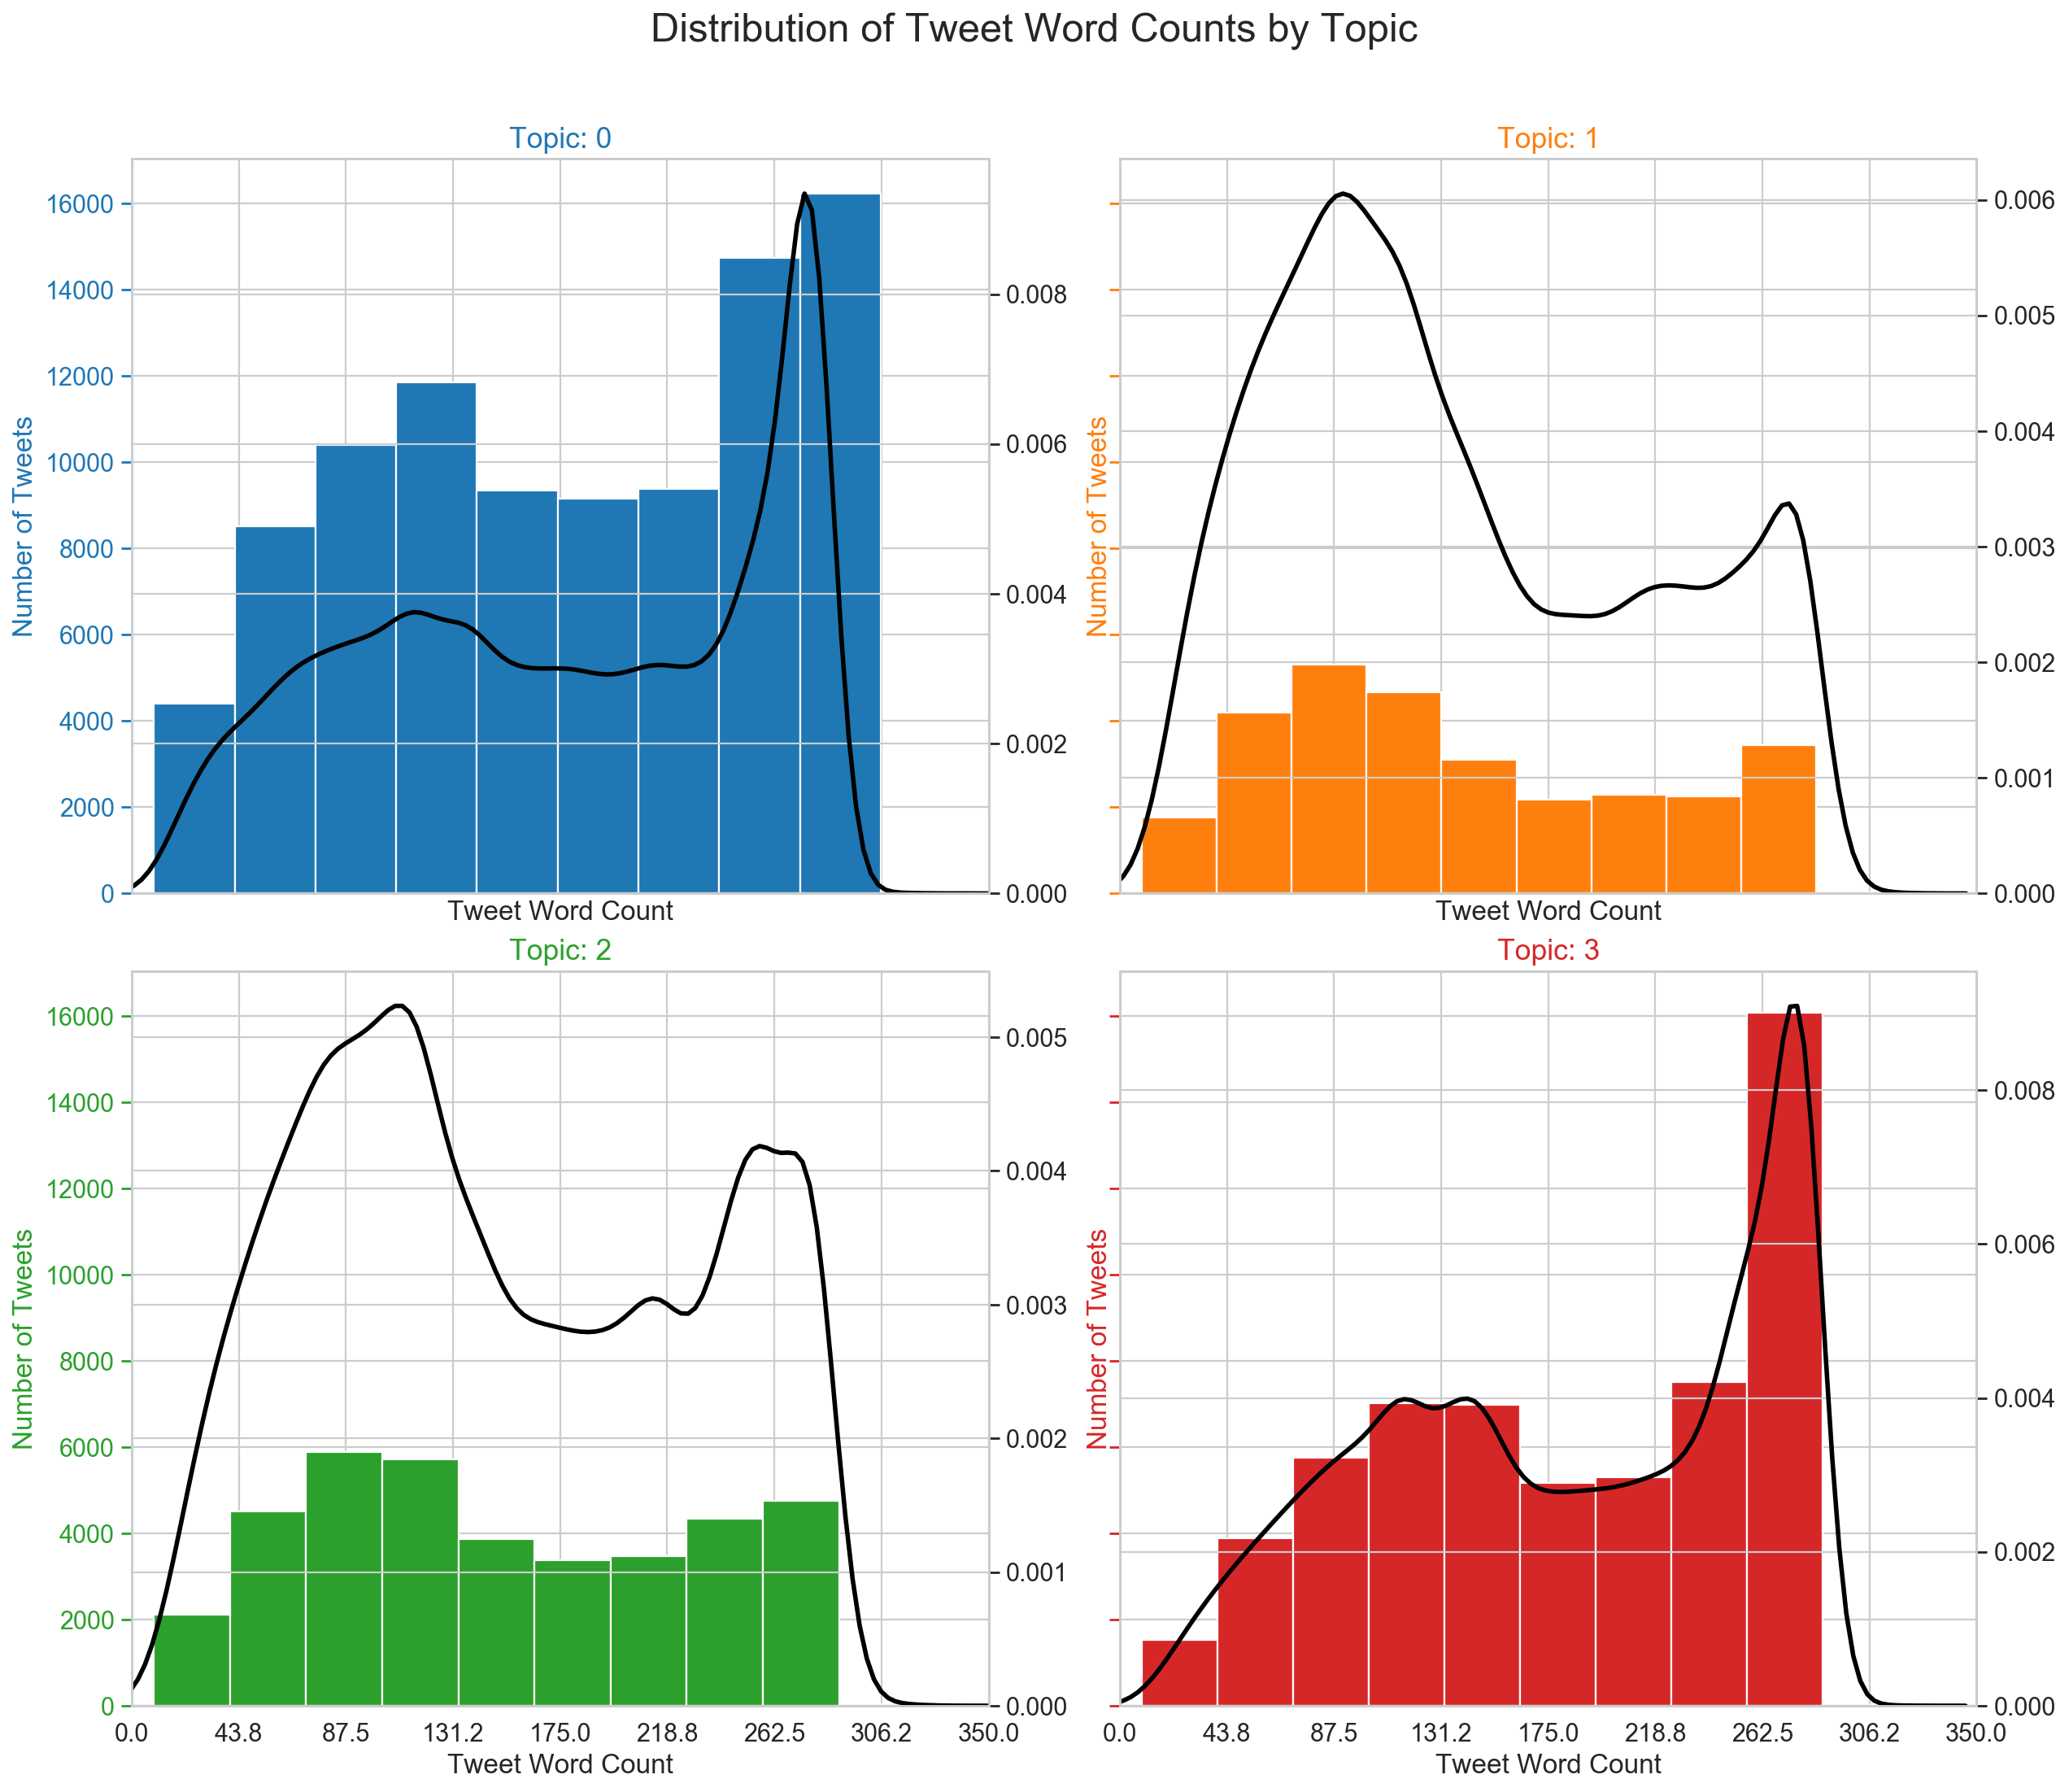

In [61]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = blm_df.loc[blm_df.topic == i, :]
    tweet_lens = [len(d) for d in df_dominant_topic_sub.tweet]
    ax.hist(tweet_lens, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(tweet_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 350), xlabel='Tweet Word Count')
    ax.set_ylabel('Number of Tweets', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,350,9))
fig.suptitle('Distribution of Tweet Word Counts by Topic', fontsize=22)
plt.show()

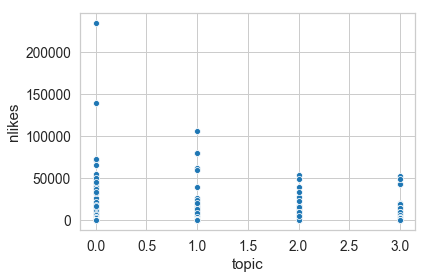

In [72]:
sns.scatterplot(x=blm_df.topic, y=blm_df.nlikes)
plt.show()